In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import nengo

In [91]:
D = 64
n_neurons = 8000
v_scale = 0.5
min_magnitude = 0.4

v = nengo.dists.UniformHypersphere(surface=True).sample(1, D)[0]

# only sample points with magnitude greater than min_magnitude
#  (mostly to avoid the big discontinuities near 0)
eval_pts = nengo.dists.UniformHypersphere(surface=False, min_magnitude=min_magnitude).sample(10000, D)


model = nengo.Network()
with model:
    stim = nengo.Node(v*v_scale)
    ens = nengo.Ensemble(n_neurons=n_neurons, dimensions=D, radius=1.1, neuron_type=nengo.LIFRate())
    
    tau = 0.1
    def feedback(x):
        norm_x = np.linalg.norm(x)
        if norm_x == 0:
            return 0*x
        return x / norm_x
    
    nengo.Connection(ens, ens, function=feedback, synapse=tau, eval_points=eval_pts)
    nengo.Connection(stim, ens, transform=tau*2)
    
    p = nengo.Probe(ens, synapse=0.1)
    
sim = nengo.Simulator(model)
with sim:
    sim.run(5.0)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

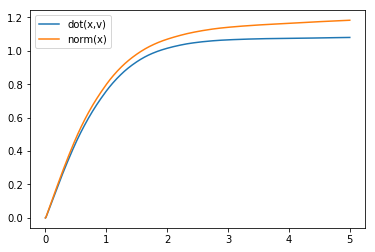

In [92]:


plt.plot(sim.trange(), np.dot(sim.data[p], v), label='dot(x,v)')
plt.plot(sim.trange(), np.linalg.norm(sim.data[p], axis=1), label='norm(x)')
plt.legend()

